# Hill climbing the test set for a classification task

Credits: Jason Brownlee, Machine Learning Mastery blog

In [1]:
# imports
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# load or prepare the classification dataset
def load_dataset():
    return make_classification(n_samples=5000, 
                               n_features=20, 
                               n_informative=15, 
                               n_redundant=5, 
                               random_state=1)

In [3]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
    return accuracy_score(y_test, yhat)

In [4]:
# create a random set of predictions
def random_predictions(n_examples):
    return [random.randint(0, 1) for _ in range(n_examples)]

In [5]:
# modify the current set of predictions
def modify_predictions(current, n_changes=1):
    # copy current solution
    updated = current.copy()
    for i in range(n_changes):
        # select a point to change
        ix = random.randint(0, len(updated)-1)
        # flip the class label
        updated[ix] = 1 - updated[ix]
    return updated

In [6]:
# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    # generate the initial solution
    solution = random_predictions(X_test.shape[0])
    # evaluate the initial solution
    score = evaluate_predictions(y_test, solution)
    scores.append(score)
    # hill climb to a solution
    for i in range(max_iterations):
        # record scores
        scores.append(score)
        # stop once we achieve the best score
        if score == 1.0:
            break
        # generate new candidate
        candidate = modify_predictions(solution)
        # evaluate candidate
        value = evaluate_predictions(y_test, candidate)
        # check if it is as good or better
        if value >= score:
            solution, score = candidate, value
            print('>%d, score=%.3f' % (i, score))
    return solution, scores

In [7]:
# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)

(5000, 20) (5000,)


In [8]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3350, 20) (1650, 20) (3350,) (1650,)


In [9]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 20000)

>1, score=0.496
>4, score=0.496
>9, score=0.497
>10, score=0.498
>14, score=0.498
>15, score=0.499
>18, score=0.499
>19, score=0.500
>21, score=0.501
>24, score=0.501
>25, score=0.502
>26, score=0.502
>27, score=0.503
>29, score=0.504
>32, score=0.504
>33, score=0.505
>34, score=0.505
>35, score=0.506
>36, score=0.507
>37, score=0.507
>38, score=0.508
>39, score=0.508
>41, score=0.509
>42, score=0.510
>43, score=0.510
>44, score=0.511
>45, score=0.512
>46, score=0.512
>47, score=0.513
>49, score=0.513
>51, score=0.514
>52, score=0.515
>53, score=0.515
>55, score=0.516
>59, score=0.516
>61, score=0.517
>62, score=0.518
>68, score=0.518
>71, score=0.519
>74, score=0.519
>75, score=0.520
>77, score=0.521
>78, score=0.521
>79, score=0.522
>80, score=0.522
>83, score=0.523
>84, score=0.524
>85, score=0.524
>87, score=0.525
>88, score=0.525
>89, score=0.526
>90, score=0.527
>100, score=0.527
>101, score=0.528
>103, score=0.528
>104, score=0.529
>106, score=0.530
>107, score=0.530
>109, score

>1391, score=0.793
>1392, score=0.794
>1397, score=0.795
>1398, score=0.795
>1403, score=0.796
>1407, score=0.796
>1411, score=0.797
>1412, score=0.798
>1413, score=0.798
>1416, score=0.799
>1418, score=0.799
>1420, score=0.800
>1423, score=0.801
>1425, score=0.801
>1426, score=0.802
>1430, score=0.802
>1434, score=0.803
>1439, score=0.804
>1445, score=0.804
>1451, score=0.805
>1454, score=0.805
>1459, score=0.806
>1483, score=0.807
>1489, score=0.807
>1490, score=0.808
>1500, score=0.808
>1501, score=0.809
>1503, score=0.810
>1511, score=0.810
>1530, score=0.811
>1533, score=0.812
>1537, score=0.812
>1544, score=0.813
>1549, score=0.813
>1551, score=0.814
>1555, score=0.815
>1564, score=0.815
>1566, score=0.816
>1568, score=0.816
>1573, score=0.817
>1581, score=0.818
>1584, score=0.818
>1589, score=0.819
>1590, score=0.819
>1596, score=0.820
>1597, score=0.821
>1607, score=0.821
>1609, score=0.822
>1613, score=0.822
>1624, score=0.823
>1625, score=0.824
>1626, score=0.824
>1638, score

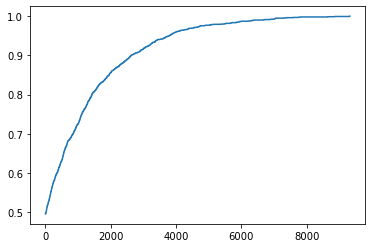

In [10]:
# plot the scores vs iterations
plt.plot(scores)
plt.show()